Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.


FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket(Target Variable)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
train_flight = pd.read_excel(r"C:\Users\Asus\Desktop\capstone project BI\Flight price prediction\Data_Train.xlsx")

In [3]:
train_flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test_flight = pd.read_excel(r"C:\Users\Asus\Desktop\capstone project BI\Flight price prediction\Test_Set.xlsx")

In [5]:
test_flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
train_flight.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
train_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


### cleaning the data and fill the missing value.

In [8]:
train_flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
test_flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

there are the 2 variable in the null value like route and total_stops.

In [10]:
train_flight['Route'] = train_flight['Route'].replace(np.nan)

In [11]:
train_flight['Route'] = train_flight['Route'].replace(np.nan , train_flight['Route'].mode())

In [12]:
train_flight['Total_Stops'] = train_flight['Total_Stops'].replace(np.nan , '2 stops')

In [13]:
train_flight['Total_Stops'] = train_flight['Total_Stops'].replace(r'^\s*$' , np.nan , regex = True)

In [14]:
train_flight['Total_Stops'] = train_flight['Total_Stops'].replace(np.nan , train_flight['Total_Stops'].mode())

Total_stops have null value replace by mode.

In [15]:
train_flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [16]:
test_flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [17]:
train_flight['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [18]:
test_flight['Total_Stops'].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [19]:
train_flight['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [20]:
train_flight['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [21]:
train_flight['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [22]:
test_flight['Airline'].unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

In [23]:
train_flight['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [24]:
test_flight['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports'], dtype=object)

### Analysis the Flight price with the feature......

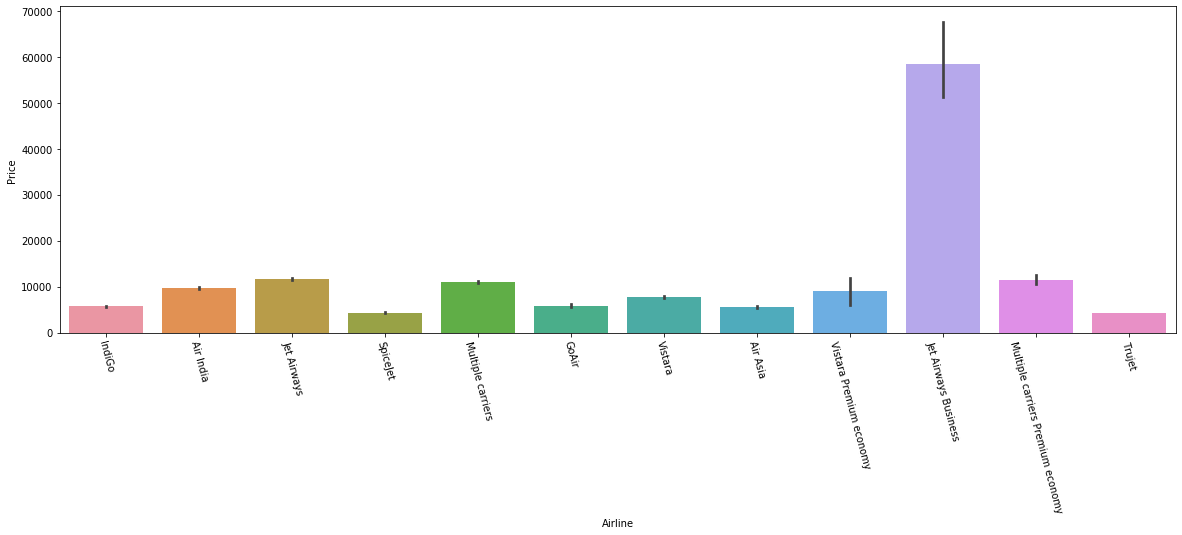

In [25]:
plt.figure(figsize=(20, 6))
sns.barplot(x = 'Airline',y='Price',data=train_flight)
plt.xticks(rotation = -75)
plt.show()


threre are different type of flight then maximum price tickets the Jet airways Business and and its flight price.
there are two flight they have minimum tickets like spicejet and trujet .

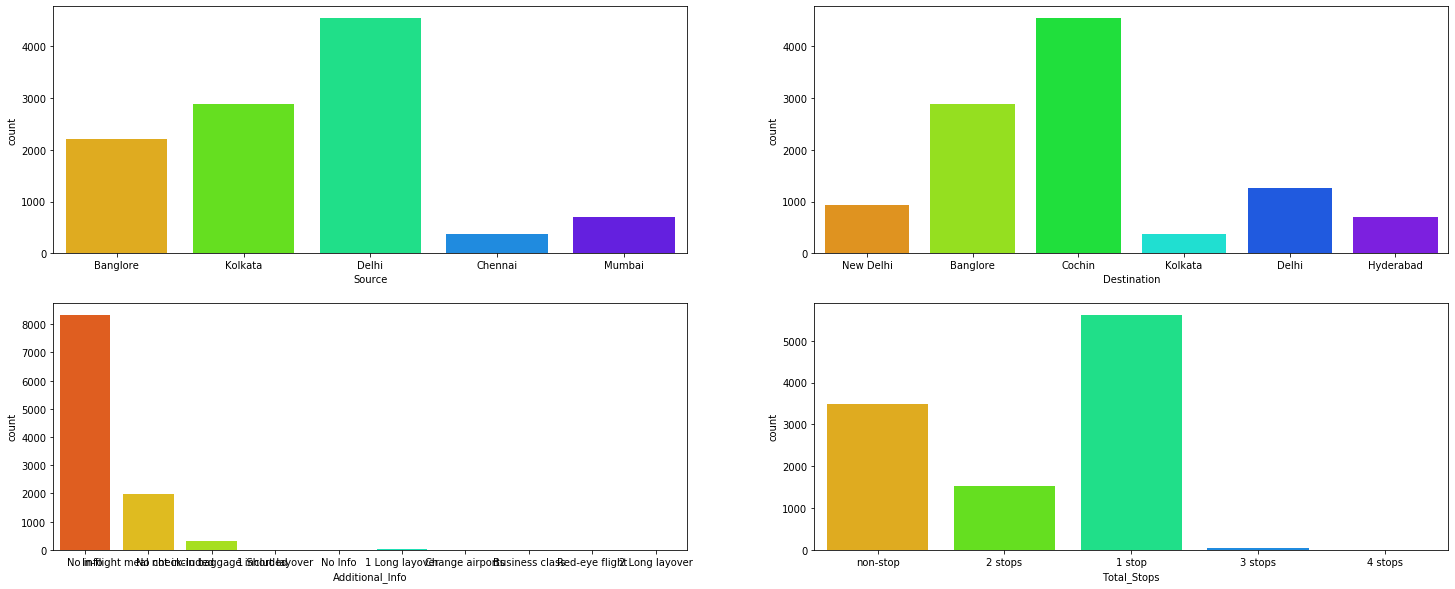

In [26]:
fig , ax = plt.subplots(2,2,figsize =(25,10))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(data = train_flight , x ='Source', palette = 'gist_rainbow',ax = ax1)
sns.countplot(data = train_flight , x ='Destination', palette = 'gist_rainbow',ax =ax2)
sns.countplot(data = train_flight , x ='Additional_Info', palette = 'gist_rainbow',ax =ax3)
sns.countplot(data = train_flight , x ='Total_Stops', palette = 'gist_rainbow',ax = ax4)
plt.show()

there are different source for flight  and maximum flight are take of the delhi .  
there are different destination for flight . maximum flight are land the coachin.

there are the maximum flight is 1 stops and some flight are non stops and some flight are 3 stops . 

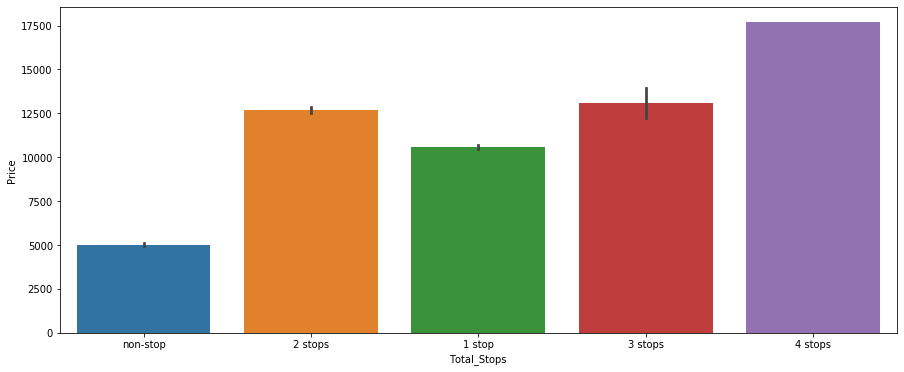

In [27]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Total_Stops' , y = 'Price',data=train_flight)
plt.show()

there are different stops for flight and there is maximum price is flight is more time to stops like 4 stops flight is maximum price.

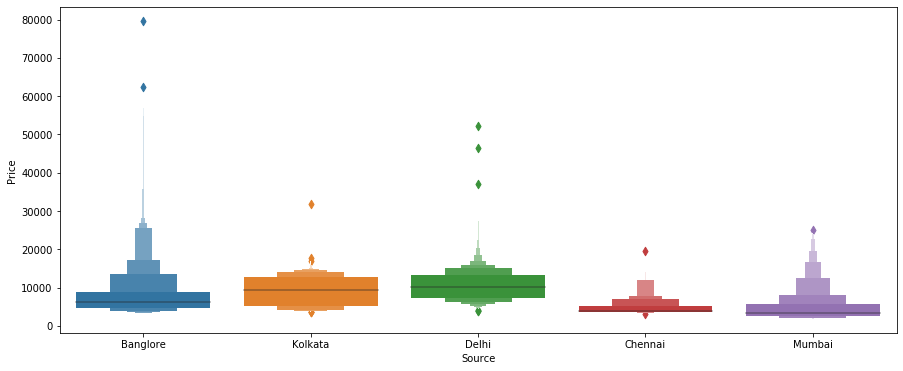

In [28]:
plt.figure(figsize=(15,6))
sns.boxenplot(x = 'Source',y = 'Price' , data = train_flight)
plt.show()

there bangalore city is maximum price for the source point and minimum is chennai .

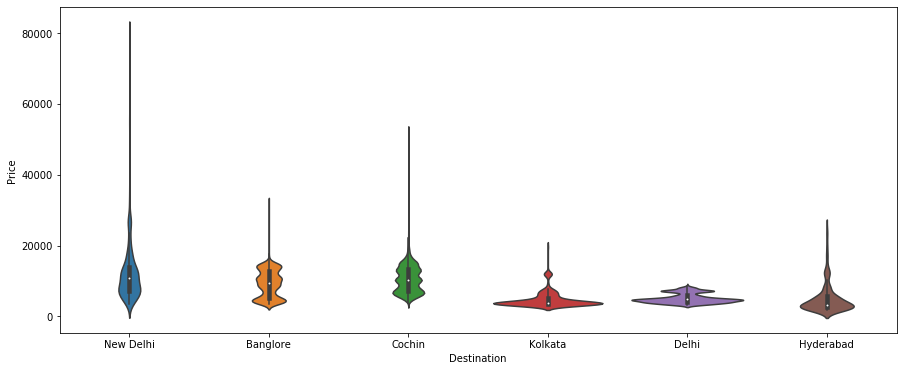

In [29]:
plt.figure(figsize=(15,6))
sns.violinplot(x = 'Destination',y = 'Price'  , data=train_flight)
plt.show()

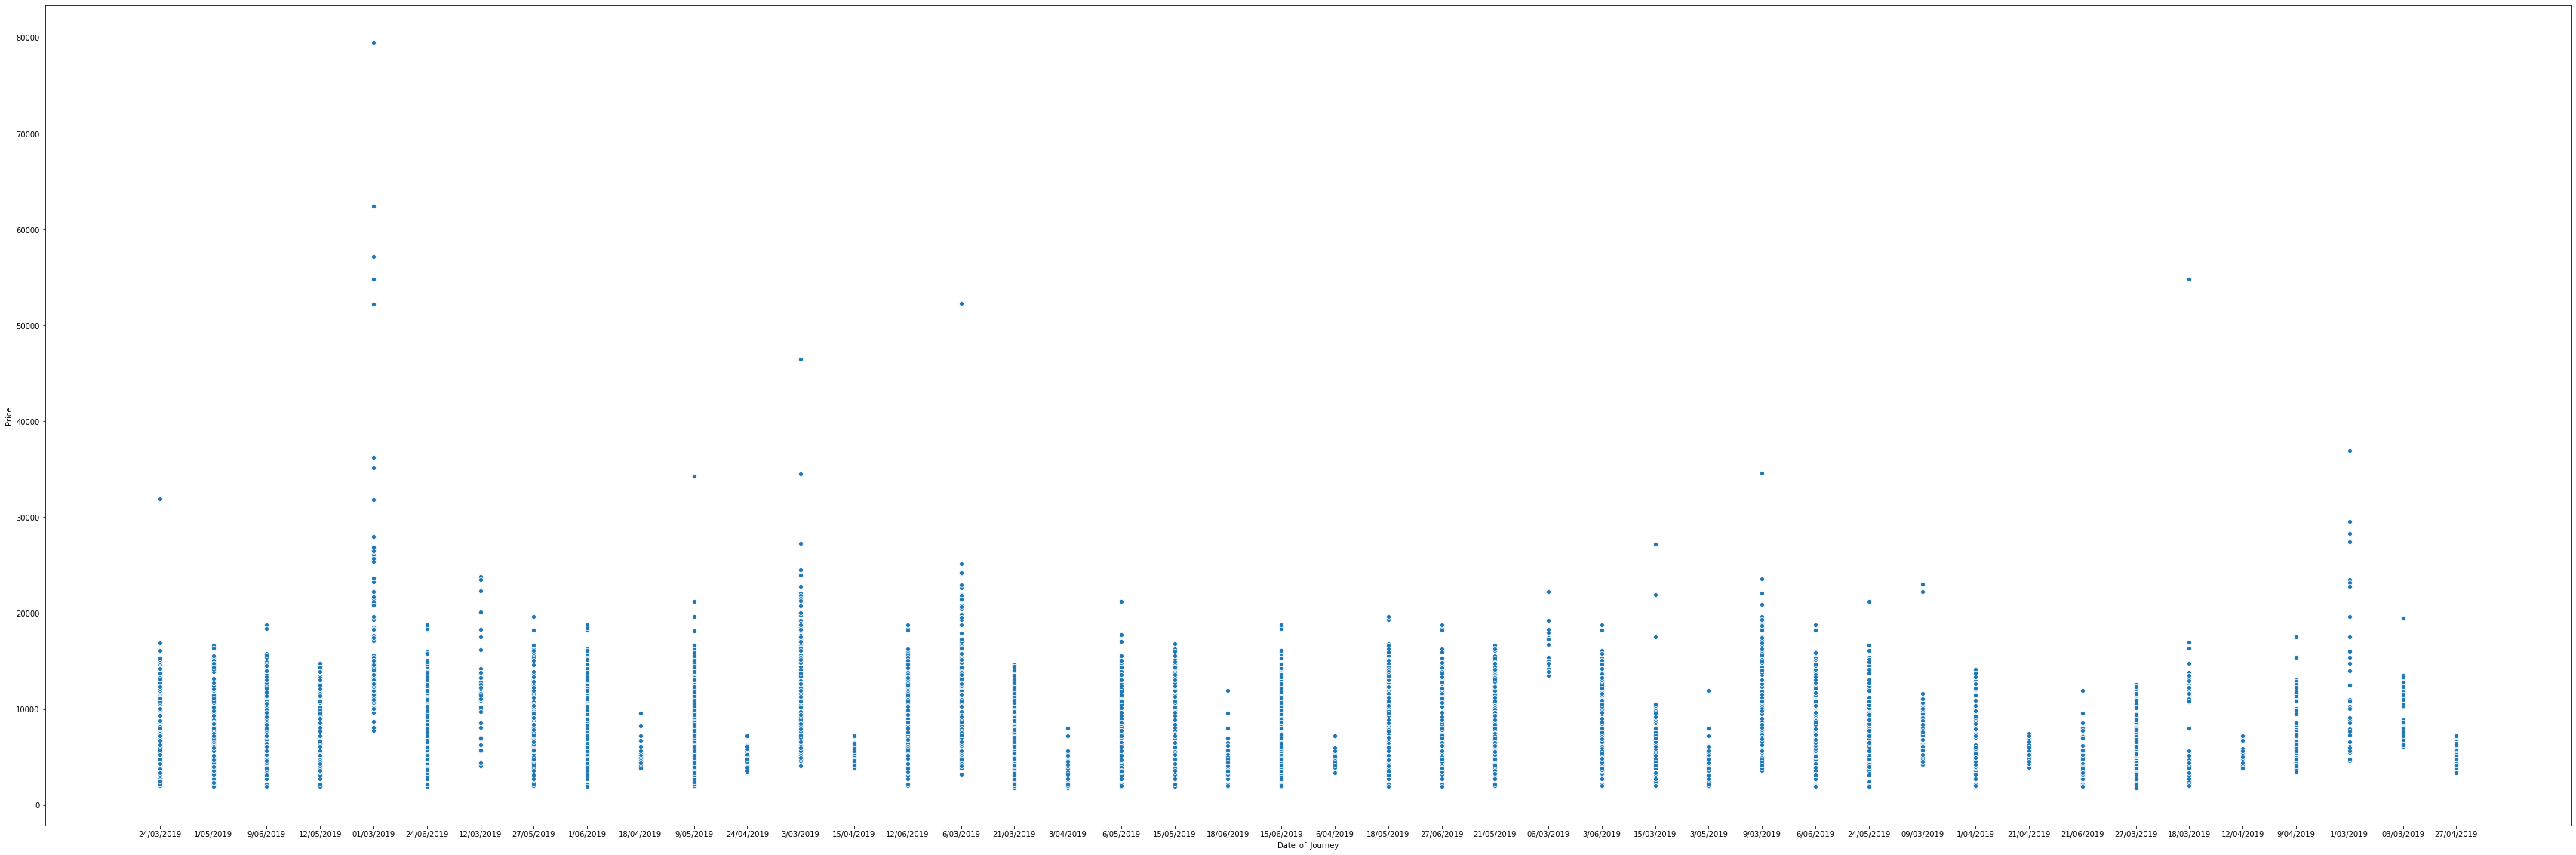

In [30]:
plt.figure(figsize=(60,20))
sns.scatterplot(x  ='Date_of_Journey' , y = 'Price' , data = train_flight)
plt.show()

There is date 1/3/2019 is maximum price for tickets and minimum price tickets date is 6/4/19

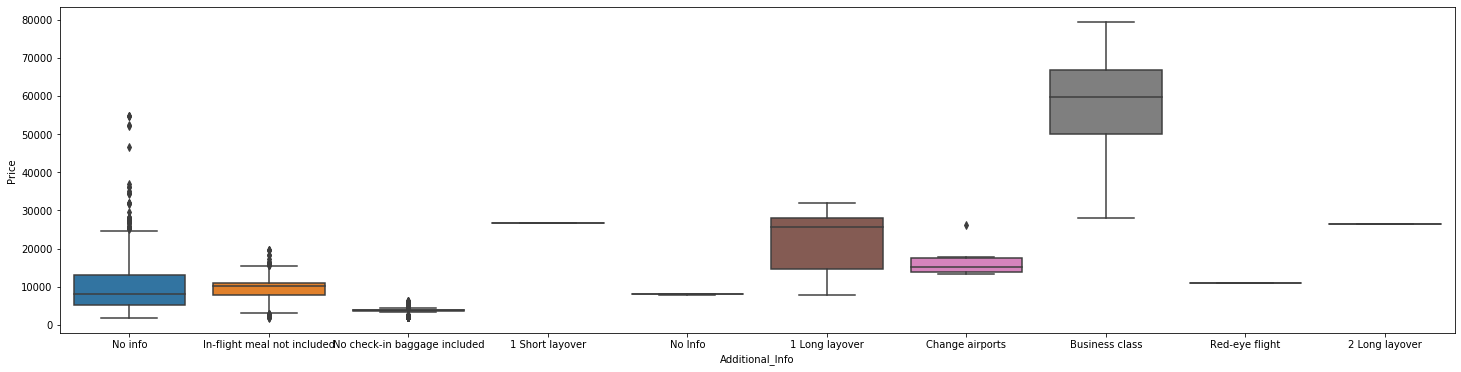

In [31]:
plt.figure(figsize=(25,6))
sns.boxplot(x = 'Additional_Info' , y = 'Price' , data = train_flight)
plt.show()

#### clean the data and drop some features is not important.

there is duration in the string format converted into the proper format.

In [32]:
train_flight['Duration'] = train_flight['Duration'].str.replace('h' , '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [33]:
train_flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


In [34]:
test_flight['Duration']  = test_flight['Duration'].str.replace('h' , '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [35]:
test_flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,655,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,240,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,1425,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,780,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,170,non-stop,No info


drop some unwanted columns that are  not useful .

In [36]:
train_flight = train_flight.drop(['Date_of_Journey','Dep_Time','Arrival_Time'] , axis = True)

In [37]:
test_flight = test_flight.drop(['Date_of_Journey','Dep_Time','Arrival_Time'] , axis = True)

In [38]:
train_flight.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302


In [39]:
test_flight.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No info


### flight duration with analysis....

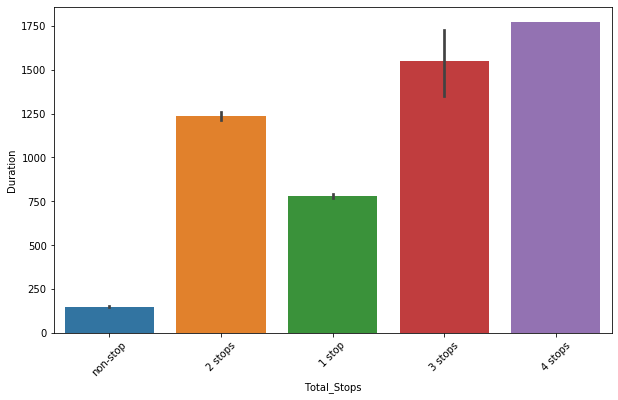

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Total_Stops' , y = 'Duration' , data = train_flight)
plt.xticks(rotation = 45)
plt.show()

there are different stops but maximum is 4 stops is take more duration . because its flight cover more route.

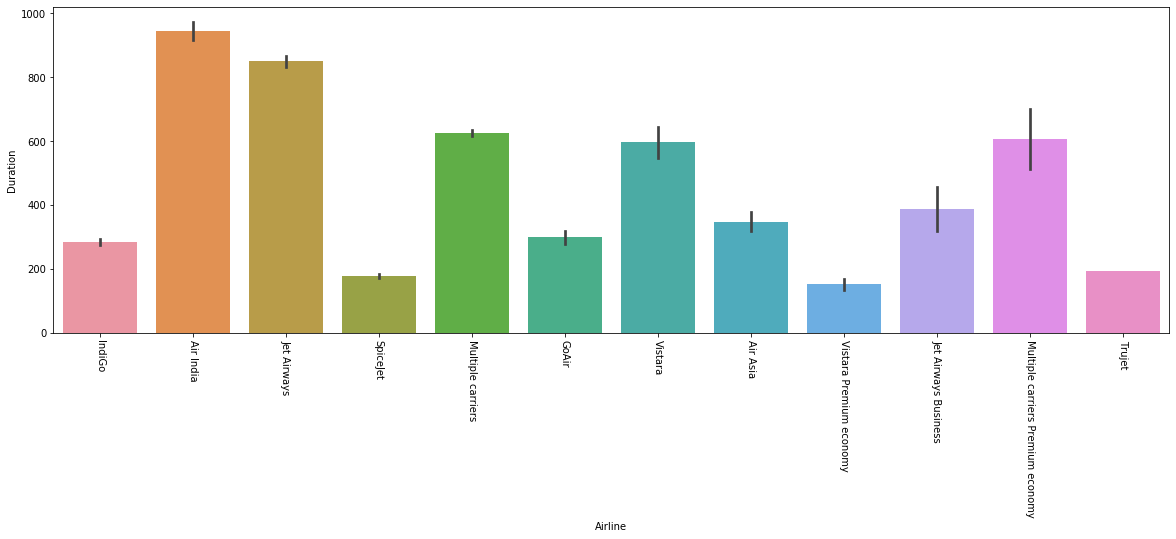

In [41]:
plt.figure(figsize=(20,6))
sns.barplot(x = 'Airline' , y = 'Duration' ,data = train_flight)
plt.xticks(rotation = -90)
plt.show()

there are different flight available but air india flight is take more time to landing ...

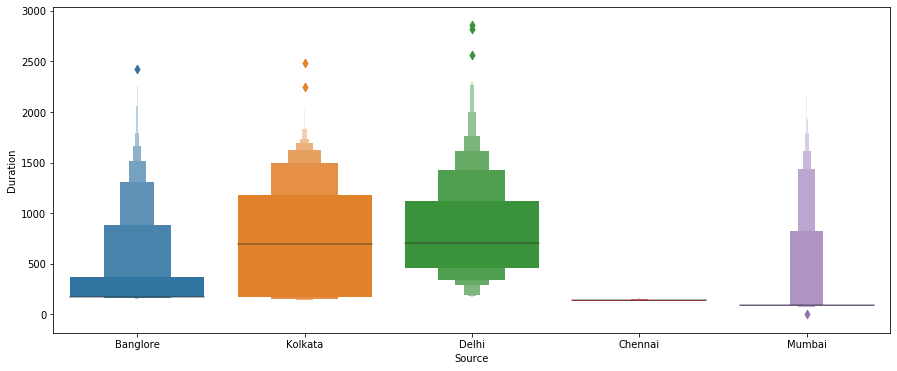

In [42]:
plt.figure(figsize=(15,6))
sns.boxenplot(x = 'Source' ,y ='Duration' ,data = train_flight)
plt.show()

there is delhi take more time to flight is take off because of lots of flight landing in delhi thats why the more time taken for take off..

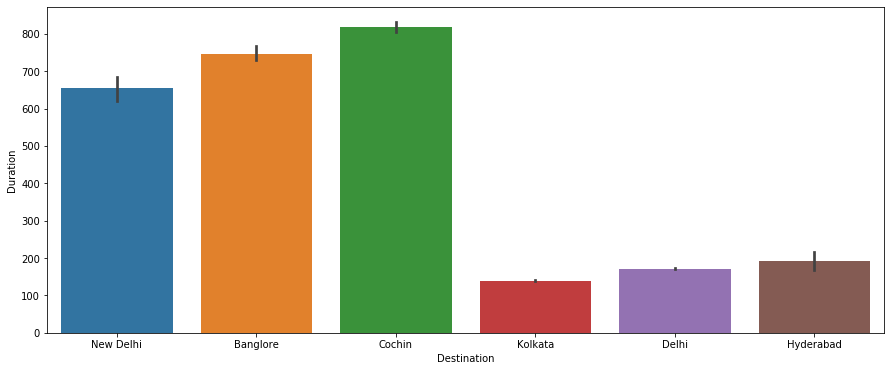

In [43]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Destination' ,y='Duration' , data = train_flight)
plt.show()

there is cochin for take more time because it is depends on flight for landing. there is more distance to the other city . and also for take more time for landing in the cochin.

In [44]:
train_flight.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302


### converted the categorical value in the numerical value

In [45]:
train_flight['Route_1'] = train_flight['Route'].str.split('→ ').str[0]

In [46]:
train_flight['Route_2'] = train_flight['Route'].str.split('→ ').str[1]

In [47]:
train_flight['Route_3'] = train_flight['Route'].str.split('→ ').str[2]

In [48]:
train_flight['Route_4'] = train_flight['Route'].str.split('→ ').str[3]

In [49]:
train_flight['Route_5'] = train_flight['Route'].str.split('→ ').str[4]

In [50]:
train_flight.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,BLR,NAG,DEL,NaN,NaN


In [51]:
test_flight['Route_1'] = test_flight['Route'].str.split('→ ').str[0]

In [52]:
test_flight['Route_2'] = test_flight['Route'].str.split('→ ').str[1]

In [53]:
test_flight['Route_3'] = test_flight['Route'].str.split('→ ').str[2]

In [54]:
test_flight['Route_4'] = test_flight['Route'].str.split('→ ').str[3]

In [55]:
test_flight['Route_5'] = test_flight['Route'].str.split('→ ').str[4]

In [56]:
test_flight.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,DEL,BOM,COK,NaN,NaN
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,CCU,MAA,BLR,NaN,NaN
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,DEL,BOM,COK,NaN,NaN
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,DEL,BOM,COK,NaN,NaN
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No info,BLR,DEL,NaN,NaN,NaN


In [57]:
train_flight['Route_1'] = train_flight['Route_1'].replace(np.nan , 'No_Route')


In [58]:
train_flight['Route_2'] = train_flight['Route_2'].replace(np.nan , 'No_Route')

In [59]:
train_flight['Route_3'] = train_flight['Route_3'].replace(np.nan , 'No_Route')

In [60]:
train_flight['Route_4'] = train_flight['Route_4'].replace(np.nan , 'No_Route')

In [61]:
train_flight['Route_5'] = train_flight['Route_5'].replace(np.nan , 'No_Route')

In [62]:
train_flight.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,BLR,DEL,No_Route,No_Route,No_Route
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,CCU,IXR,BBI,BLR,No_Route
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,DEL,LKO,BOM,COK,No_Route
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,CCU,NAG,BLR,No_Route,No_Route
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,BLR,NAG,DEL,No_Route,No_Route


In [63]:
test_flight['Route_1'] = test_flight['Route_1'].replace(np.nan , 'No_Route')

In [64]:
test_flight['Route_2'] = test_flight['Route_2'].replace(np.nan , 'No_Route')

In [65]:
test_flight['Route_3'] = test_flight['Route_3'].replace(np.nan , 'No_Route')

In [66]:
test_flight['Route_4'] = test_flight['Route_4'].replace(np.nan , 'No_Route')

In [67]:
test_flight['Route_5'] = test_flight['Route_5'].replace(np.nan , 'No_Route')

In [68]:
test_flight.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,DEL,BOM,COK,No_Route,No_Route
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,CCU,MAA,BLR,No_Route,No_Route
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,DEL,BOM,COK,No_Route,No_Route
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,DEL,BOM,COK,No_Route,No_Route
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No info,BLR,DEL,No_Route,No_Route,No_Route


In [69]:
train_flight = train_flight.drop('Route' ,axis=True)

In [70]:
train_flight.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,170,non-stop,No info,3897,BLR,DEL,No_Route,No_Route,No_Route
1,Air India,Kolkata,Banglore,445,2 stops,No info,7662,CCU,IXR,BBI,BLR,No_Route
2,Jet Airways,Delhi,Cochin,1140,2 stops,No info,13882,DEL,LKO,BOM,COK,No_Route
3,IndiGo,Kolkata,Banglore,325,1 stop,No info,6218,CCU,NAG,BLR,No_Route,No_Route
4,IndiGo,Banglore,New Delhi,285,1 stop,No info,13302,BLR,NAG,DEL,No_Route,No_Route


In [71]:
test_flight = test_flight.drop('Route',axis = True)

In [72]:
test_flight.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,Jet Airways,Delhi,Cochin,655,1 stop,No info,DEL,BOM,COK,No_Route,No_Route
1,IndiGo,Kolkata,Banglore,240,1 stop,No info,CCU,MAA,BLR,No_Route,No_Route
2,Jet Airways,Delhi,Cochin,1425,1 stop,In-flight meal not included,DEL,BOM,COK,No_Route,No_Route
3,Multiple carriers,Delhi,Cochin,780,1 stop,No info,DEL,BOM,COK,No_Route,No_Route
4,Air Asia,Banglore,Delhi,170,non-stop,No info,BLR,DEL,No_Route,No_Route,No_Route


#### converted the data into suitable format.

In [73]:
flight = pd.get_dummies(train_flight , columns=['Source','Destination','Airline','Additional_Info'])

In [74]:
train_flight = flight

In [75]:
train_flight.head()

,Duration,Total_Stops,Price,Route_1,Route_2,Route_3,Route_4,Route_5,Source_Banglore,Source_Chennai,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,170,non-stop,3897,BLR,DEL,No_Route,No_Route,No_Route,1,0,...,0,0,0,0,0,0,0,0,1,0
1,445,2 stops,7662,CCU,IXR,BBI,BLR,No_Route,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1140,2 stops,13882,DEL,LKO,BOM,COK,No_Route,0,0,...,0,0,0,0,0,0,0,0,1,0
3,325,1 stop,6218,CCU,NAG,BLR,No_Route,No_Route,0,0,...,0,0,0,0,0,0,0,0,1,0
4,285,1 stop,13302,BLR,NAG,DEL,No_Route,No_Route,1,0,...,0,0,0,0,0,0,0,0,1,0


In [76]:
flight1 = pd.get_dummies(test_flight , columns=['Source','Destination','Airline','Additional_Info'])

In [77]:
test_flight = flight1

In [78]:
test_flight.head()

,Duration,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Source_Banglore,Source_Chennai,Source_Delhi,...,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Additional_Info_1 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info
0,655,1 stop,DEL,BOM,COK,No_Route,No_Route,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,240,1 stop,CCU,MAA,BLR,No_Route,No_Route,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1425,1 stop,DEL,BOM,COK,No_Route,No_Route,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,780,1 stop,DEL,BOM,COK,No_Route,No_Route,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,170,non-stop,BLR,DEL,No_Route,No_Route,No_Route,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [79]:
train_flight['Route_1'].unique()

array(['BLR ', 'CCU ', 'DEL ', 'MAA ', 'BOM '], dtype=object)

In [80]:
train_flight['Route_2'].unique()

array(['DEL', 'IXR ', 'LKO ', 'NAG ', 'BLR', 'BOM ', 'BLR ', 'CCU',
       'AMD ', 'PNQ ', 'CCU ', 'COK ', 'IDR ', 'GAU ', 'MAA ', 'HYD ',
       'COK', 'DEL ', 'HYD', 'BHO ', 'JAI ', 'ATQ ', 'JDH ', 'BBI ',
       'GOI ', 'BDQ ', 'TRV ', 'IXU ', 'IXB ', 'UDR ', 'RPR ', 'DED ',
       'VGA ', 'VNS ', 'IXC ', 'PAT ', 'JLR ', 'KNU ', 'GWL ', 'VTZ ',
       'NDC ', 'IXZ ', 'HBX ', 'IXA ', 'STV '], dtype=object)

In [81]:
train_flight['Route_3'].unique()

array(['No_Route', 'BBI ', 'BOM ', 'BLR', 'DEL', 'COK', 'DEL ', 'AMD ',
       'HYD', 'JDH ', 'MAA ', 'COK ', 'GOI ', 'NAG ', 'GAU ', 'BHO ',
       'IXR ', 'IDR ', 'ISK ', 'HYD ', 'VGA ', 'PNQ ', 'JAI ', 'TRV ',
       'HBX ', 'IMF ', 'CCU ', 'UDR ', 'VTZ ', 'IXC '], dtype=object)

In [82]:
train_flight['Route_4'].unique()

array(['No_Route', 'BLR', 'COK', 'DEL', 'BOM ', 'HYD', 'DEL ', 'HYD ',
       'GWL ', 'TRV ', 'BBI ', 'BHO ', 'AMD ', 'NAG '], dtype=object)

In [83]:
train_flight['Route_5'].unique()

array(['No_Route', 'COK', 'BLR', 'DEL', 'HYD', 'VGA '], dtype=object)

In [84]:
test_flight['Route_1'].unique()

array(['DEL ', 'CCU ', 'BLR ', 'BOM ', 'MAA '], dtype=object)

In [85]:
test_flight['Route_2'].unique()

array(['BOM ', 'MAA ', 'DEL', 'TRV ', 'HYD ', 'BLR', 'DEL ', 'JAI ',
       'BHO ', 'HYD', 'PNQ ', 'CCU', 'BLR ', 'IXR ', 'COK', 'LKO ',
       'IXB ', 'CCU ', 'GAU ', 'COK ', 'BBI ', 'AMD ', 'GOI ', 'IXU ',
       'IDR ', 'RPR ', 'NAG ', 'PAT ', 'VNS ', 'ATQ ', 'VGA ', 'BDQ ',
       'DED ', 'STV ', 'KNU ', 'UDR ', 'JDH ', 'GWL ', 'IXC '],
      dtype=object)

In [86]:
test_flight['Route_3'].unique()

array(['COK', 'BLR', 'No_Route', 'DEL', 'BOM ', 'COK ', 'MAA ', 'BBI ',
       'AMD ', 'DEL ', 'NAG ', 'HYD', 'BHO ', 'VGA ', 'IXC ', 'IDR ',
       'GOI ', 'HBX ', 'GAU ', 'UDR ', 'TIR ', 'VTZ ', 'TRV ', 'JDH ',
       'HYD ', 'ISK ', 'IXR ', 'PNQ '], dtype=object)

In [87]:
test_flight['Route_4'].unique()

array(['No_Route', 'COK', 'BLR', 'BOM ', 'DEL', 'GWL ', 'HYD', 'TRV ',
       'HYD ', 'DEL '], dtype=object)

In [88]:
test_flight['Route_5'].unique()

array(['No_Route', 'BLR', 'COK', 'DEL', 'VGA '], dtype=object)

In [89]:
train_flight['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [90]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [91]:
train_flight.head()

,Duration,Total_Stops,Price,Route_1,Route_2,Route_3,Route_4,Route_5,Source_Banglore,Source_Chennai,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,170,non-stop,3897,BLR,DEL,No_Route,No_Route,No_Route,1,0,...,0,0,0,0,0,0,0,0,1,0
1,445,2 stops,7662,CCU,IXR,BBI,BLR,No_Route,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1140,2 stops,13882,DEL,LKO,BOM,COK,No_Route,0,0,...,0,0,0,0,0,0,0,0,1,0
3,325,1 stop,6218,CCU,NAG,BLR,No_Route,No_Route,0,0,...,0,0,0,0,0,0,0,0,1,0
4,285,1 stop,13302,BLR,NAG,DEL,No_Route,No_Route,1,0,...,0,0,0,0,0,0,0,0,1,0


In [92]:
train_flight['Route_1'] = label_encoder.fit_transform(train_flight['Route_1'])

In [93]:
train_flight['Route_2'] = label_encoder.fit_transform(train_flight['Route_2'])

In [94]:
train_flight['Route_3'] = label_encoder.fit_transform(train_flight['Route_3'])

In [95]:
train_flight['Route_4'] = label_encoder.fit_transform(train_flight['Route_4'])

In [96]:
train_flight['Route_5'] = label_encoder.fit_transform(train_flight['Route_5'])

In [97]:
train_flight.head()

,Duration,Total_Stops,Price,Route_1,Route_2,Route_3,Route_4,Route_5,Source_Banglore,Source_Chennai,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,170,non-stop,3897,0,13,24,12,4,1,0,...,0,0,0,0,0,0,0,0,1,0
1,445,2 stops,7662,2,25,1,3,4,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1140,2 stops,13882,3,32,4,5,4,0,0,...,0,0,0,0,0,0,0,0,1,0
3,325,1 stop,6218,2,34,3,12,4,0,0,...,0,0,0,0,0,0,0,0,1,0
4,285,1 stop,13302,0,34,8,12,4,1,0,...,0,0,0,0,0,0,0,0,1,0


In [98]:
test_flight['Route_1'] = label_encoder.fit_transform(test_flight['Route_1'])

In [99]:
test_flight['Route_2'] = label_encoder.fit_transform(test_flight['Route_2'])

In [100]:
test_flight['Route_3'] = label_encoder.fit_transform(test_flight['Route_3'])

In [101]:
test_flight['Route_4'] = label_encoder.fit_transform(test_flight['Route_4'])

In [102]:
test_flight['Route_5'] = label_encoder.fit_transform(test_flight['Route_5'])

In [103]:
test_flight.head()

,Duration,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Source_Banglore,Source_Chennai,Source_Delhi,...,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Additional_Info_1 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info
0,655,1 stop,3,7,5,8,3,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,240,1 stop,2,29,3,8,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1425,1 stop,3,7,5,8,3,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,780,1 stop,3,7,5,8,3,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,170,non-stop,0,13,21,8,3,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [104]:
dic = {'non-stop':0 , '1 stop':1 , '2 stops':2,'3 stops':3 ,'4 stops':4}
train_flight['Total_Stops'] = train_flight['Total_Stops'].map(dic)
train_flight['Total_Stops'] = train_flight['Total_Stops'].astype('category')

In [105]:
dic = {'non-stop':0 , '1 stop':1 , '2 stops':2,'3 stops':3 ,'4 stops':4}
test_flight['Total_Stops'] = test_flight['Total_Stops'].map(dic)
test_flight['Total_Stops'] = test_flight['Total_Stops'].astype('category')

In [106]:
train_flight = train_flight.drop('Airline_Trujet',axis=True)

In [107]:
train_flight = train_flight.drop(['Additional_Info_1 Short layover','Additional_Info_No Info','Additional_Info_Red-eye flight','Additional_Info_2 Long layover'], 
                                 axis = True)

In [108]:
test_flight.head()

,Duration,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Source_Banglore,Source_Chennai,Source_Delhi,...,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Additional_Info_1 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info
0,655,1,3,7,5,8,3,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,240,1,2,29,3,8,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1425,1,3,7,5,8,3,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,780,1,3,7,5,8,3,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,170,0,0,13,21,8,3,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [109]:
train_flight.head()

,Duration,Total_Stops,Price,Route_1,Route_2,Route_3,Route_4,Route_5,Source_Banglore,Source_Chennai,...,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Additional_Info_1 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info
0,170,0,3897,0,13,24,12,4,1,0,...,0,0,0,0,0,0,0,0,0,1
1,445,2,7662,2,25,1,3,4,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1140,2,13882,3,32,4,5,4,0,0,...,0,0,0,0,0,0,0,0,0,1
3,325,1,6218,2,34,3,12,4,0,0,...,0,0,0,0,0,0,0,0,0,1
4,285,1,13302,0,34,8,12,4,1,0,...,0,0,0,0,0,0,0,0,0,1


In [110]:
# sns.pairplot(train_flight)
# plt.show()

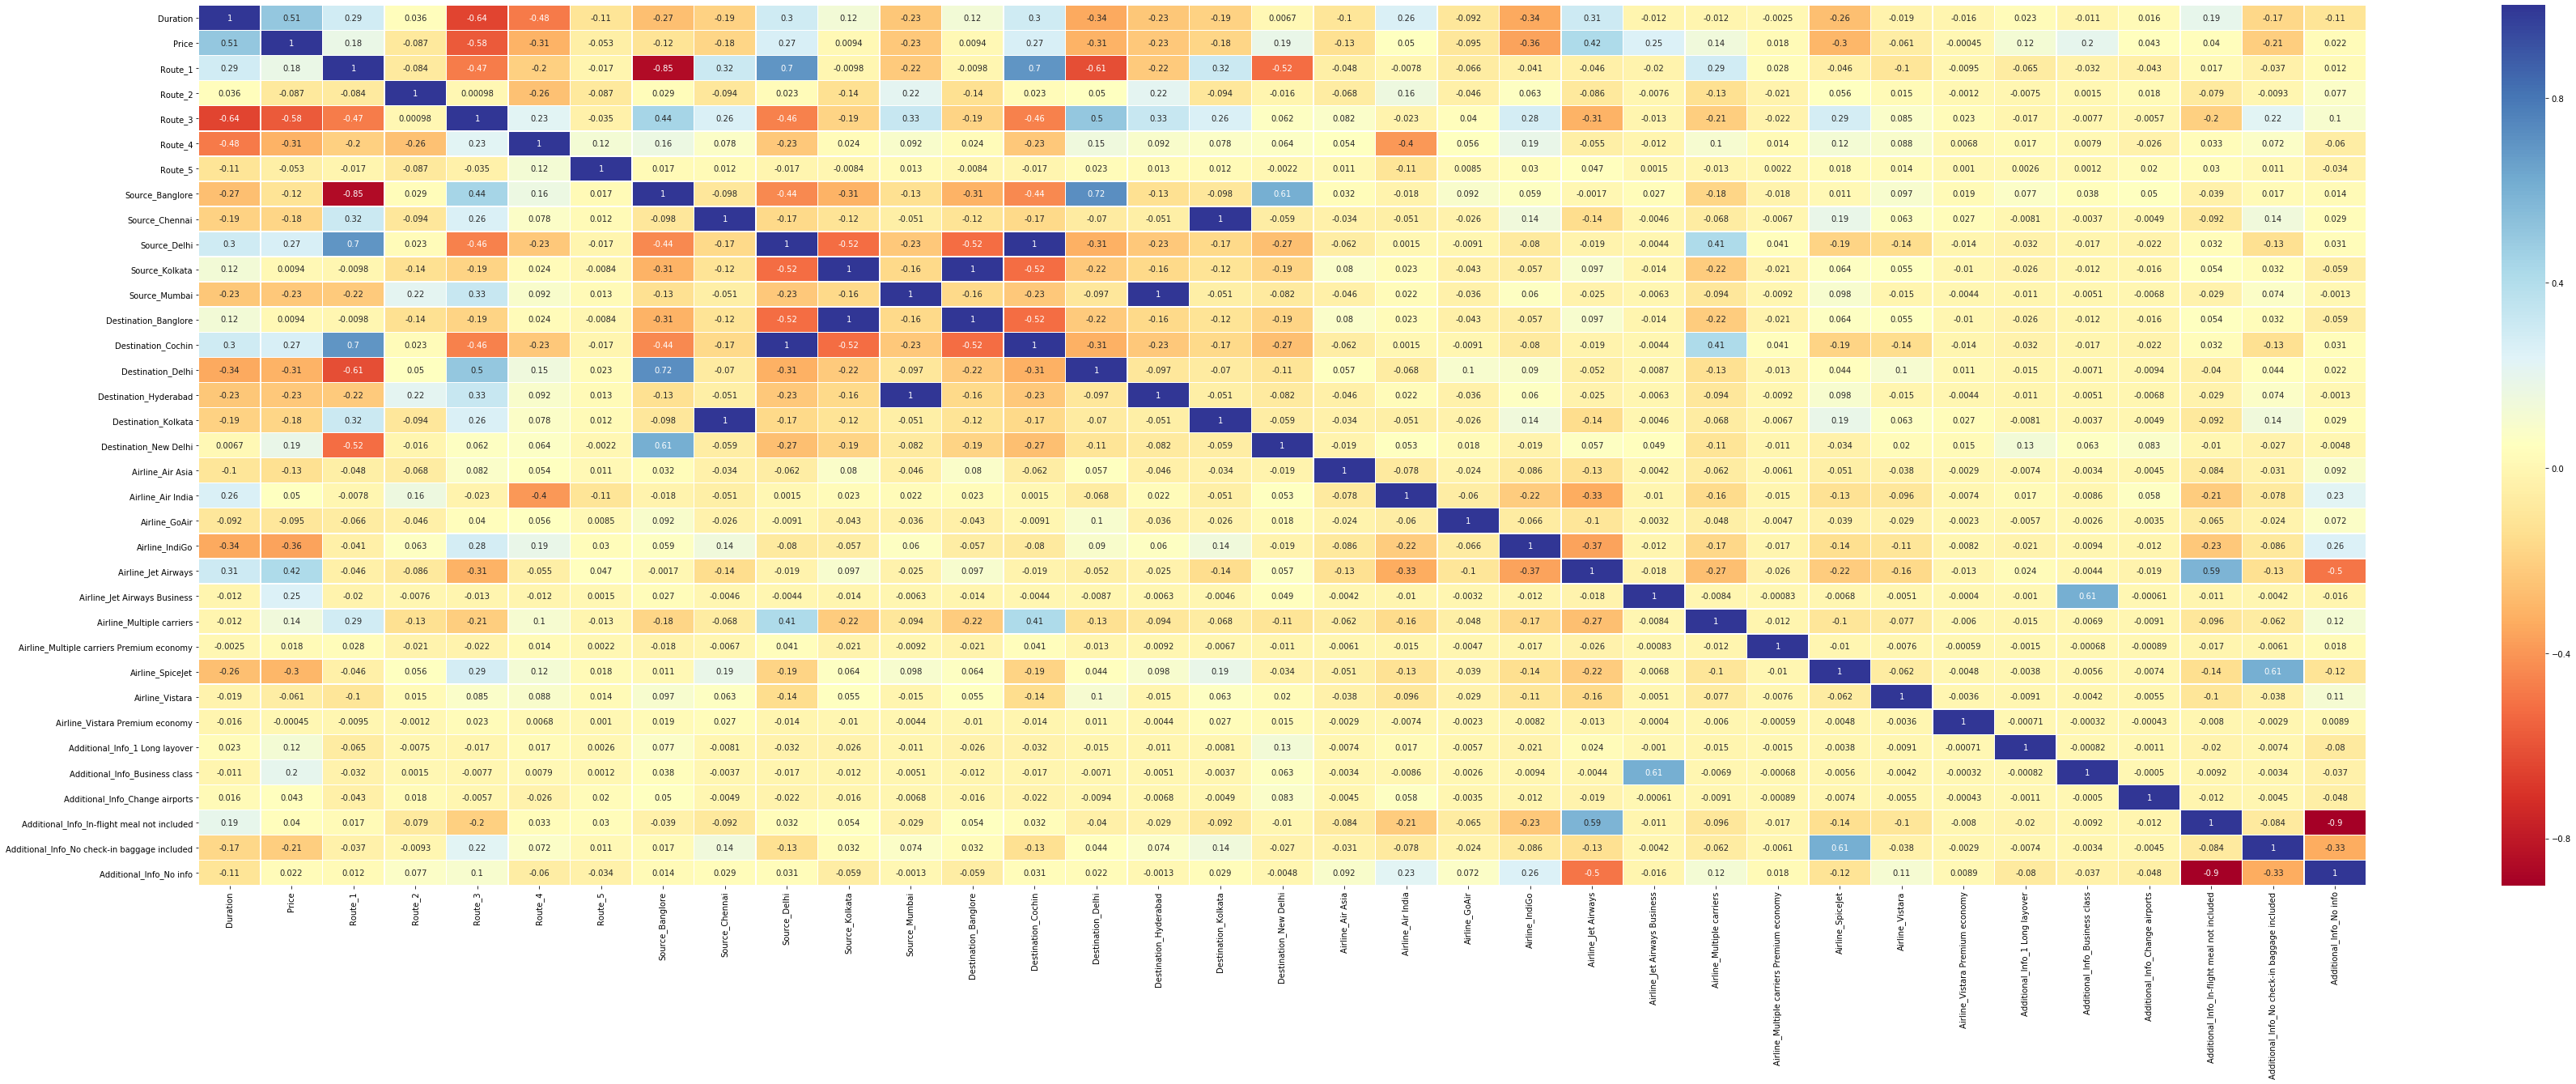

In [111]:
plt.figure(figsize=(60,20))
sns.heatmap(train_flight.corr() , annot = True ,cmap='RdYlBu',linewidths=0.5)
plt.show()

there are multiple variabal corelation find the best variabal to predict the price.

# train_test_split 

In [112]:
x = train_flight['Duration'].values

In [113]:
y = train_flight['Price'].values

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3 ,random_state = 0)

In [116]:
x_train.shape , x_test.shape

((7478,), (3205,))

In [117]:
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)


### simple linear regression .....


In [118]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [119]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
lr.intercept_  , lr.coef_

(array([6119.87710545]), array([[4.60735373]]))

In [121]:
y_pred1 = lr.predict(x_test)

In [122]:
y_pred1

array([[ 9229.84087195],
       [ 6764.90662739],
       [10151.31161758],
       ...,
       [ 8515.70104409],
       [ 9690.57624477],
       [ 6534.53894098]])

### evalulating the metrics 

r2_score for the testing data...

In [123]:
from sklearn.metrics import r2_score
print("r2_score value for test" , r2_score(y_test,y_pred1))

r2_score value for test 0.267408928176174


In [124]:
from sklearn.metrics import mean_squared_error
print("mean_squared error " , mean_squared_error(y_test,y_pred1))

mean_squared error  14839694.815070353


In [125]:
rms = np.sqrt(mean_squared_error(y_test,y_pred1))
rms

3852.2324456177817

Visualizing the train set result

Text(0, 0.5, 'price')

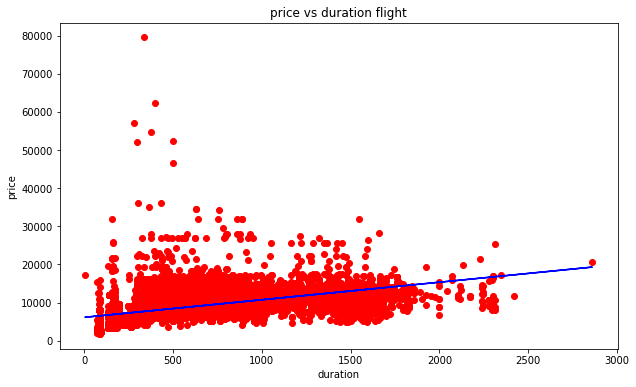

In [126]:
plt.figure(figsize=(10,6))
plt.scatter(x_train,y_train,color = 'red')
plt.plot(x_train,lr.predict(x_train),color = 'blue')
plt.title('price vs duration flight')
plt.xlabel('duration')
plt.ylabel('price')

visualizing the test set result

Text(0, 0.5, 'price')

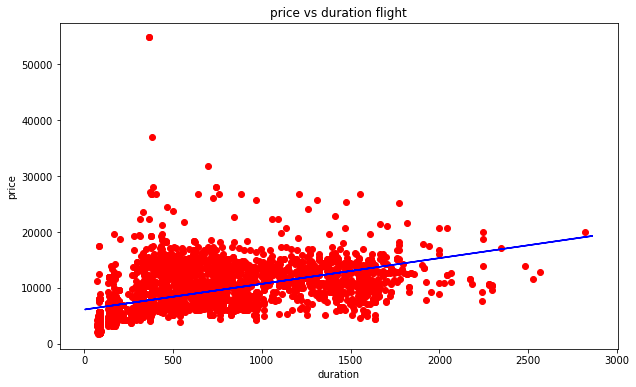

In [127]:
plt.figure(figsize=(10,6))
plt.scatter(x_test,y_test,color = 'red')
plt.plot(x_train,lr.predict(x_train),color = 'blue')
plt.title('price vs duration flight')
plt.xlabel('duration')
plt.ylabel('price')

### multiple regression with all variabal ......

In [128]:
x1 = train_flight.drop('Price',axis = 1)

In [129]:
y1 = train_flight['Price']

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
x1_train , x1_test , y1_train ,y1_test = train_test_split(x1 , y1 ,test_size = 0.3 , random_state = 0)

In [132]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()

In [133]:
lr1.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
y_pred2 = lr1.predict(x1_test)

In [135]:
y_pred2

array([ 7372.67128326,  4451.64425773, 10525.65803379, ...,
       11275.80666891, 13628.1444358 ,  8497.35633986])

In [136]:
print("r2_score value for test" , r2_score(y1_test,y_pred2))

r2_score value for test 0.6505096055907863


In [137]:
from sklearn.metrics import mean_squared_error
print("mean_squared error" , mean_squared_error(y1_test,y_pred2))

mean_squared error 7079434.889807821


In [138]:
rms = np.sqrt(mean_squared_error(y1_test,y_pred2))
rms

2660.720746303118

### multiple linear Regression with RFE .....

In [139]:
x2 = train_flight.drop('Price',axis = 1)

In [140]:
y2 = train_flight['Price']

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
x2_train , x2_test , y2_train ,y2_test = train_test_split(x2 , y2 ,test_size = 0.3 , random_state = 0)

In [143]:
from sklearn.linear_model import LinearRegression
lr3 = LinearRegression()

In [144]:
from sklearn.feature_selection import RFE 

In [145]:
rfe = RFE(lr3,32)

In [146]:
rfe.fit(x2_train , y2_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=32, step=1, verbose=0)

In [147]:
columns = x2_train.columns[rfe.support_]
columns

Index(['Total_Stops', 'Route_1', 'Route_2', 'Route_4', 'Route_5',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Additional_Info_1 Long layover', 'Additional_Info_Business class',
       'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info'],
      dtype='object')

In [148]:
lr3.fit(x2_train[columns],y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
y_pred33 = lr3.predict(x2_test[columns])

In [150]:
y_pred33

array([ 7362.88021043,  4508.36136536, 10554.27552878, ...,
       11275.53958796, 13627.52034781,  8500.56871181])

In [151]:
print("r2_score value for test" , r2_score(y2_test,y_pred33))

r2_score value for test 0.6509046149374279


In [152]:
from sklearn.metrics import mean_squared_error
print("mean_squared error" , mean_squared_error(y2_test,y_pred33))

mean_squared error 7071433.402513322


In [153]:
rms = np.sqrt(mean_squared_error(y2_test,y_pred33))
rms

2659.216689650041

In [154]:
y_pred = lr3.predict(test_flight[columns])
y_pred

array([12211.6342608 ,  5411.56845287,  8524.42962849, ...,
       12211.6342608 ,  8160.35880501,  9836.92544764])

In [155]:
sample_submission = pd.DataFrame()
sample_submission['Price'] = y_pred

In [156]:
sample_submission.to_csv('sample_submission.csv',index = False)

### Random_Forest _Regression

In [157]:
from sklearn.ensemble import RandomForestRegressor

In [158]:
lr4 = RandomForestRegressor(n_estimators = 100  ,max_features = 30)

In [159]:
lr4.fit(x2_train , y2_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=30, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [160]:
lr4.score(x2_train , y2_train)

0.8472515479382077

In [161]:
y_pred44 = lr4.predict(x2_test)

In [162]:
y_pred44

array([ 7047.51447619,  4057.71581855, 11752.29617044, ...,
        8915.26479837, 14448.71731654,  6817.61676131])

In [163]:
print("calculated the r2_score", r2_score(y2_test , y_pred44))

calculated the r2_score 0.7039550253044535


In [164]:
from sklearn.metrics import mean_squared_error
print("mean_squared error" , mean_squared_error(y2_test,y_pred44))

mean_squared error 5996820.388596844


In [165]:
rms = np.sqrt(mean_squared_error(y2_test,y_pred44))
rms

2448.8406213138583

In [166]:
from sklearn.feature_selection import RFE 

In [167]:
rfe = RFE(lr4,32)

In [168]:
rfe.fit(x2_train , y2_train)

RFE(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                    max_depth=None, max_features=30,
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None, min_samples_leaf=1,
                                    min_samples_split=2,
                                    min_weight_fraction_leaf=0.0,
                                    n_estimators=100, n_jobs=None,
                                    oob_score=False, random_state=None,
                                    verbose=0, warm_start=False),
    n_features_to_select=32, step=1, verbose=0)

In [169]:
lr4.fit(x2_train[columns],y2_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=30, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [170]:
y_pred55 = lr4.predict(x2_test[columns])

In [171]:
y_pred55

array([ 6552.96603595,  4146.76923159, 11589.38897362, ...,
       11057.87149079, 14130.8918136 ,  6729.19292218])

In [172]:
y_pred2 = lr4.predict(test_flight[columns])
y_pred2

array([15640.69092785,  5935.97212101, 11822.26969751, ...,
       15640.69092785, 11291.92584322, 11447.81087559])

In [173]:
sample_submission = pd.DataFrame()
sample_submission['Price'] = y_pred2

In [174]:
sample_submission.to_csv('sample_submission1.csv',index = False)

### Polynomial Regreesion

In [175]:
x = train_flight['Duration'].values

In [176]:
y = train_flight['Price'].values

In [177]:
x5_train , x5_test , y5_train ,  y5_test = train_test_split(x ,y ,test_size = 0.3 ,random_state=0)

In [178]:
from sklearn.preprocessing import PolynomialFeatures

In [179]:
model = PolynomialFeatures(degree = 4)


In [180]:
y = y.reshape(-1,1)


In [181]:
x5_train = x5_train.reshape(-1,1)
y5_train = y5_train.reshape(-1,1)
x5_test = x5_test.reshape(-1,1)
y5_test = y5_test.reshape(-1,1)


In [182]:
y_ = model.fit_transform(y)  


In [183]:
y2_test_ = model.fit_transform(x5_test)

In [184]:
lr5 = LinearRegression()

In [185]:
lr5.fit(y_ , x)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [186]:
y_pred66 = lr5.predict(y2_test_)

In [187]:
print('Calculated the r2 score',r2_score(y5_test , y_pred66))

Calculated the r2 score -4.548258342644913


In [188]:
from sklearn.metrics import mean_squared_error
print("mean_squared error" , mean_squared_error(y5_test,y_pred66))

mean_squared error 112388020.72081271


In [189]:
rms = np.sqrt(mean_squared_error(y5_test,y_pred66))
rms

10601.321649719563

## SVM Regression

In [190]:
x = train_flight['Duration'].values

In [191]:
y = train_flight['Price'].values

In [192]:
x6_train , x6_test , y6_train ,  y6_test = train_test_split(x ,y ,test_size = 0.3 ,random_state=0)

In [193]:
from sklearn.svm import SVR

In [194]:
svr = SVR(epsilon = 0.5)

In [195]:
x6_train =  x6_train.reshape(-1,1)
y6_train =  y6_train.reshape(-1,1)
x6_test =  x6_test.reshape(-1,1)
y6_test =  y6_test.reshape(-1,1)

In [196]:
svr.fit(x6_train , y6_train)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.5,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [197]:
y_pred77 = svr.predict(x6_test)

In [198]:
y_pred77

array([8369.75, 8222.75, 8374.75, ..., 8383.75, 8376.75, 8102.75])

In [199]:
print('Calculated the r2 score',r2_score(y6_test , y_pred77))

Calculated the r2 score -0.004244575397686967


In [200]:
from sklearn.metrics import mean_squared_error
print("mean_squared error" , mean_squared_error(y6_test,y_pred77))

mean_squared error 20342430.575205524


In [201]:
rms = np.sqrt(mean_squared_error(y6_test,y_pred77))
rms

4510.258371225037

there are the different types of algorithm but there are the different types variable in  the flight dataset .
but calculated different metrics . and good accuracy of model is random forest algorithm than other .